# Linear Regression 선형회귀모델

데이터 생성  
y = 2x + 5 에 근사하는 데이터 생성

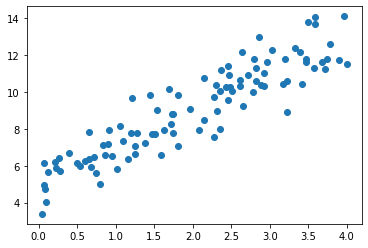

In [1]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0) # 시드값 고정

w0 = 5 # y절편
w1 = 2 # 회귀 계수
noise = np.random.randn(100, 1) # 노이즈

x = 4 * np.random.rand(100, 1) # 0 ~ 4 사이 실수값 100개 생성 (x값)
y = w1*x + w0 + noise # y값

plt.scatter(x, y);

모델 훈련

In [2]:
from sklearn.linear_model import LinearRegression

linear_reg_model = LinearRegression() # 선형 회귀 모델
linear_reg_model.fit(x, y) # 모델 훈련

print('y절편(w0):', linear_reg_model.intercept_)
print('회귀계수(w1):', linear_reg_model.coef_)

y절편(w0): [5.09772262]
회귀계수(w1): [[1.9808382]]


회귀선 확인

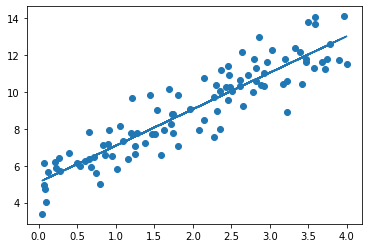

In [3]:
y_pred = linear_reg_model.predict(x) # 예측

plt.scatter(x, y)
plt.plot(x, y_pred); # 선형 회귀선 그리기

# Decision Tree 결정트리(의사결정나무)

In [4]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer

# 유방암 데이터 세트 불러오기
cancer_data = load_breast_cancer()
# 훈련, 테스트 데이터로 분리
X_train, X_test, y_train, y_test = train_test_split(cancer_data['data'], 
                                                cancer_data['target'], 
                                                stratify=cancer_data['target'], 
                                                test_size=0.4, 
                                                random_state=42)

decisiontree = DecisionTreeClassifier(random_state=42) # 결정 트리 정의
decisiontree.fit(X_train, y_train) # 모델 훈련

accuracy = decisiontree.score(X_test, y_test) # 정확도 측정

# 테스트 데이터를 활용하여 결정 트리 모델 정확도 출력
print(f'결정 트리 정확도: {accuracy:.3f}')

결정 트리 정확도: 0.930


# Random Forest  
* 결정트리를 배깅 방식으로 결합한 모델

In [5]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer

# 유방암 데이터 세트 불러오기
cancer_data = load_breast_cancer()
# 훈련, 테스트 데이터로 분리
X_train, X_test, y_train, y_test = train_test_split(cancer_data['data'], 
                                                cancer_data['target'], 
                                                stratify=cancer_data['target'], 
                                                test_size=0.4, 
                                                random_state=42)

randomforest = RandomForestClassifier(random_state=42) # 랜덤 포레스트 정의
randomforest.fit(X_train, y_train) # 모델 훈련

accuracy = randomforest.score(X_test, y_test) # 정확도 측정

# 테스트 데이터를 활용하여 랜덤 포레스트 모델 정확도 출력
print(f'랜덤 포레스트 정확도: {accuracy:.3f}')

랜덤 포레스트 정확도: 0.939


# 하이퍼파라미터 최적화

* 그리드서치
* 랜덤서치
* 베이지안 최적화

### 베이지안 최적화

1) 하이퍼 파라미터 탐색 범위 설정¶

In [6]:
# 하이퍼 파라미터 범위 (딕셔너리 형태)
param_bounds = {'x': (-1, 5), 
                'y': (0, 4)}

2) 평가지표 계산 함수 정의

In [7]:
def eval_function(x, y):
    return -x ** 2 - (y - 2) ** 2 + 10

3) 베이지안 최적화 객체 생성

In [8]:
from bayes_opt import BayesianOptimization

# 베이지안 최적화 객체 생성
optimizer = BayesianOptimization(f=eval_function,
                                 pbounds=param_bounds,
                                 random_state=0)

4) 최적화 수행

In [9]:
# 베이지안 최적화 수행
optimizer.maximize(init_points=2, n_iter=10)

|   iter    |  target   |     x     |     y     |
-------------------------------------------------
|  1        |  4.002    |  2.293    |  2.861    |
|  2        |  3.121    |  2.617    |  2.18     |
|  3        |  3.832    |  2.327    |  2.869    |
|  4        |  4.596    |  2.171    |  2.832    |
|  5        | -6.227    |  3.989    |  2.559    |
|  6        |  9.467    |  0.3522   |  1.361    |
|  7        |  7.39     | -1.0      |  3.269    |
|  8        |  5.0      | -1.0      |  0.0      |
|  9        |  3.841    |  1.469    |  0.0      |
|  10       |  8.966    | -1.0      |  1.817    |
|  11       |  9.737    |  0.1806   |  2.48     |
|  12       |  5.785    |  0.4638   |  4.0      |


In [10]:
# 평가점수가 최대일 때 타깃, x, y 값 출력
optimizer.max

{'target': 9.73708754050397,
 'params': {'x': 0.18063747442587866, 'y': 2.4798776535004214}}